In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
UNSW_NB15 = pd.read_csv("UNSW_NB15_Modified.csv")
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 0, 'Count')

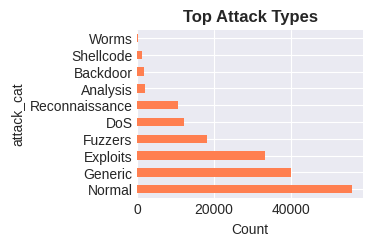

In [20]:
# THe distribution of attack types in UNSW_NB15
ax1 = plt.subplot(2, 2, 1)
UNSW_NB15['attack_cat'].value_counts().head(10).plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Top Attack Types', fontweight='bold')
ax1.set_xlabel('Count')

[Text(0, 0, '-'),
 Text(1, 0, 'dns'),
 Text(2, 0, 'http'),
 Text(3, 0, 'smtp'),
 Text(4, 0, 'ftp-data'),
 Text(5, 0, 'ftp'),
 Text(6, 0, 'ssh'),
 Text(7, 0, 'pop3'),
 Text(8, 0, 'dhcp'),
 Text(9, 0, 'other')]

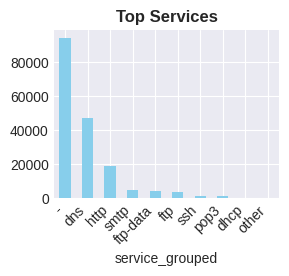

In [21]:
# Next let's visualize service distribution
ax2 = plt.subplot(2, 2, 2)
UNSW_NB15['service_grouped'].value_counts().head(10).plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Top Services', fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

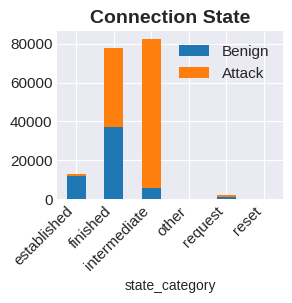

In [22]:
# Connection state graph
ax3 = plt.subplot(2, 2, 3)
pd.crosstab(UNSW_NB15['state_category'], UNSW_NB15['is_attack']).plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Connection State', fontweight='bold', fontsize=14)
ax3.legend(['Benign', 'Attack'], fontsize=11)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax3.tick_params(labelsize=11)

In [ ]:
# Plotting attack severity (we'll run this once we've landed on methodology in regards to scoring severity)
ax4 = plt.subplot(2, 2, 4)
UNSW_NB15[UNSW_NB15['is_attack']==1]['attack_severity'].value_counts().sort_index().plot(
    kind='bar', ax=ax4, color='crimson')
ax4.set_title('Attack Severity Levels', fontweight='bold', fontsize=14)
ax4.set_xlabel('Severity Level', fontsize=12)
ax4.set_ylabel('Count', fontsize=12)
ax4.tick_params(labelsize=11)

Text(0.5, 0.98, '')

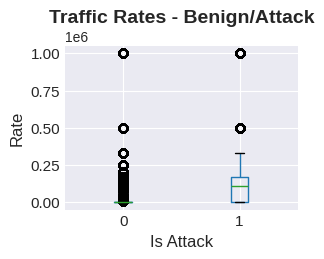

In [26]:
# Traffic rate comparison
ax5 = plt.subplot(2, 2, 1)
UNSW_NB15.boxplot(column='rate', by='is_attack', ax=ax5)
ax5.set_title('Traffic Rates - Benign/Attack', fontweight='bold', fontsize=14)
ax5.set_xlabel('Is Attack', fontsize=12)
ax5.set_ylabel('Rate', fontsize=12)
ax5.tick_params(labelsize=11)
plt.suptitle('')

Text(0.5, 0.98, '')

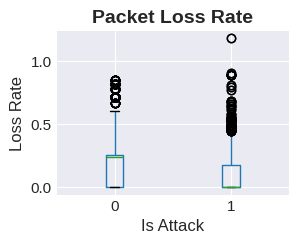

In [27]:
# Packet loss visualization
ax6 = plt.subplot(2, 2, 2)
UNSW_NB15.boxplot(column='loss_rate', by='is_attack', ax=ax6)
ax6.set_title('Packet Loss Rate', fontweight='bold', fontsize=14)
ax6.set_xlabel('Is Attack', fontsize=12)
ax6.set_ylabel('Loss Rate', fontsize=12)
ax6.tick_params(labelsize=11)
plt.suptitle('')

/tmp/ipykernel_11358/2302415643.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax7.legend(title='Is Attack', fontsize=11)


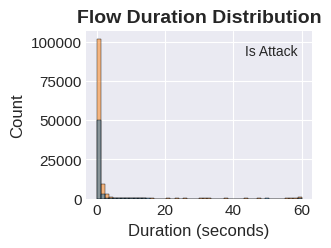

In [28]:
# Duration distribution
ax7 = plt.subplot(2, 2, 3)
sns.histplot(data=UNSW_NB15[UNSW_NB15['dur'] < 100], x='dur', hue='is_attack', bins=50, ax=ax7)
ax7.set_title('Flow Duration Distribution', fontweight='bold', fontsize=14)
ax7.set_xlabel('Duration (seconds)', fontsize=12)
ax7.set_ylabel('Count', fontsize=12)
ax7.legend(title='Is Attack', fontsize=11)
ax7.tick_params(labelsize=11)


/tmp/ipykernel_11358/319943319.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax8.legend(title='Is Attack', fontsize=11)


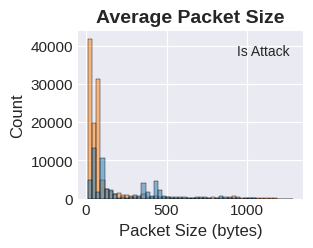

In [29]:
# Packet size
ax8 = plt.subplot(2, 2, 4)
sns.histplot(data=UNSW_NB15[UNSW_NB15['avg_packet_size'] < 2000], x='avg_packet_size', 
             hue='is_attack', bins=50, ax=ax8)
ax8.set_title('Average Packet Size', fontweight='bold', fontsize=14)
ax8.set_xlabel('Packet Size (bytes)', fontsize=12)
ax8.set_ylabel('Count', fontsize=12)
ax8.legend(title='Is Attack', fontsize=11)
ax8.tick_params(labelsize=11)

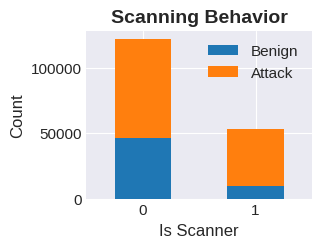

In [31]:
# Scanning indicators
ax9 = plt.subplot(2, 2, 2)
scan_data = UNSW_NB15.groupby(['is_scanner', 'is_attack']).size().unstack()
scan_data.plot(kind='bar', ax=ax9, stacked=True)
ax9.set_title('Scanning Behavior', fontweight='bold', fontsize=14)
ax9.set_xlabel('Is Scanner', fontsize=12)
ax9.set_ylabel('Count', fontsize=12)
ax9.legend(['Benign', 'Attack'], fontsize=11)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=0, fontsize=11)
ax9.tick_params(labelsize=11)